# **E-commerce Sales Analysis and Forecasting (Kaggle - E-commerce Dataset)**

## Step 1: Data Loading and Initial Exploration

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('E-commerce Dataset.csv')

In [69]:
df.head(3)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [71]:
df.shape

(51290, 16)

In [72]:
df.drop('Customer_Id', axis = 1).describe()

,Aging,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,250.000000,5.000000,0.500000,167.500000,16.800000


In [73]:
df.nunique()

Order_Date               356
Time                   35275
Aging                     11
Customer_Id            38997
Gender                     2
Device_Type                2
Customer_Login_type        4
Product_Category           4
Product                   42
Sales                     39
Quantity                   5
Discount                   5
Profit                   391
Shipping_Cost            153
Order_Priority             4
Payment_method             5
dtype: int64

## Step 2: Data Cleaning

#### 2.1 Handle Missing Values & Duplicates

In [74]:
#checking NaN values
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [75]:
#Handling missing values by Dropping
df.dropna(inplace = True)

In [76]:
# Check for exact duplicate rows in the entire dataset
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 0


#### 2.2 Convert Date to Datetime & Aggregating Data

In [77]:
# Convert 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Set 'Order_Date' as the index for time series analysis
df.set_index('Order_Date', inplace=True)


In [78]:
# Select numerical columns for aggregation
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost']

# Resample data monthly and aggregate numerical columns
df_monthly = df[numerical_cols].resample('ME').sum()

# Check the results
print(df_monthly.head())


               Sales  Quantity  Discount    Profit  Shipping_Cost
Order_Date                                                       
2018-01-31  379627.0    6324.0     763.4  174573.6        17461.0
2018-02-28  332495.0    5539.0     669.6  153288.2        15331.7
2018-03-31  435502.0    7168.0     886.6  200936.8        20096.8
2018-04-30  596990.0    9791.0    1181.1  277646.2        27769.1
2018-05-31  824362.0   13534.0    1643.2  379205.8        37926.4


In [79]:
# Saving the aggregated monthly sales data to a CSV file
df_monthly.to_csv('monthly_sales_data.csv', index=True)  # Ensure 'index=True' to keep the date index


## Step 3: Exploratory Data Analysis (EDA)

#### 3.1 Plot Sales Trends Over Time

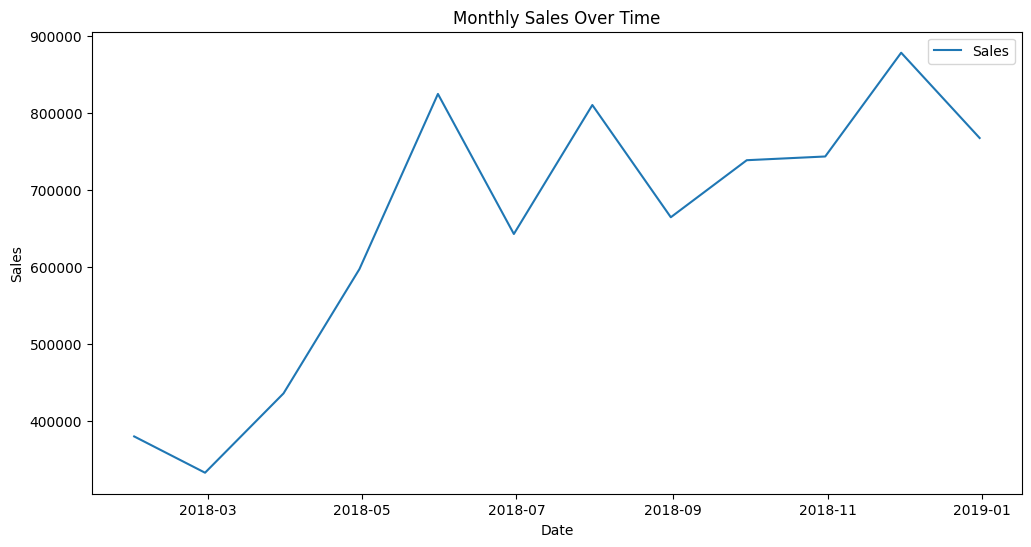

In [52]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly['Sales'], label='Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### 3.2 Sales by Product Category

Visualize the distribution of MonthlyCharges and TotalCharges.

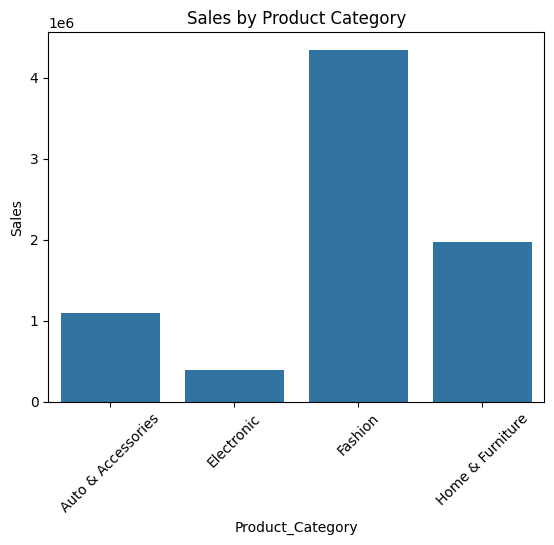

In [54]:
#group sales by product category
category_sales = df.groupby('Product_Category')['Sales'].sum().reset_index()

#Bar plot for produt categories
sns.barplot(x='Product_Category', y='Sales', data = category_sales)
plt.title('Sales by Product Category')
plt.xticks(rotation = 45)
plt.show()

## Step 4: Time Seires Forecasting

#### 4.1 Linear Regression for Forcasting

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# prepare the data for Linear Regression
X = df_monthly.index.map(pd.Timestamp.toordinal).values.reshape(-1,1) #convert date to ordinal
y = df_monthly['Sales'].values

#Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = False)

#Initializing and Training the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
#Predict future sales
y_pred = lr.predict(X_test)

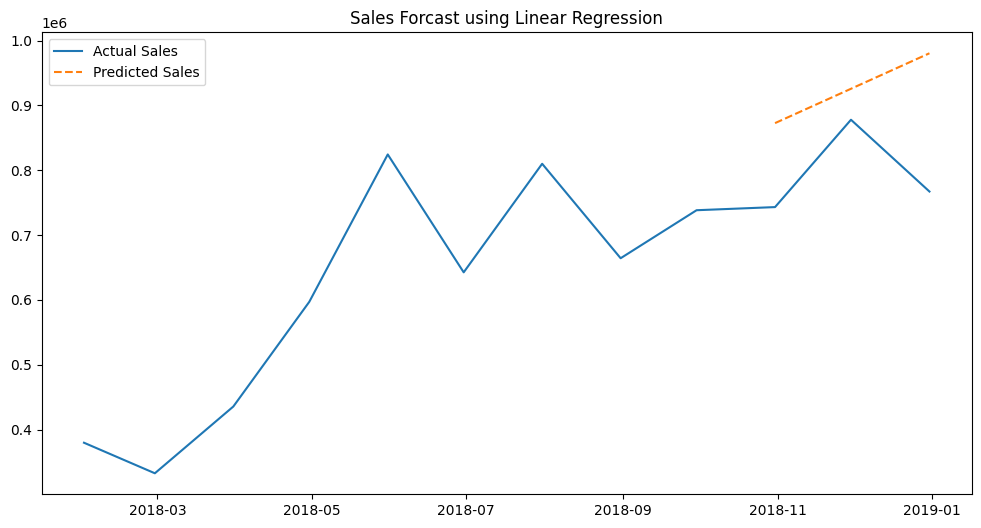

In [57]:
#Plotting the Results
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Sales'], label='Actual Sales')
plt.plot(df_monthly.index[-len(y_test):], y_pred, label = 'Predicted Sales', linestyle = '--')
plt.title('Sales Forcast using Linear Regression')
plt.legend()
plt.show()

#### 4.2 ElasticNet Regression for Forecasting

In [59]:
from sklearn.linear_model import ElasticNet

#Initializing Model
elastic_Nt = ElasticNet()
elastic_Nt.fit(X_train, y_train)

ElasticNet()

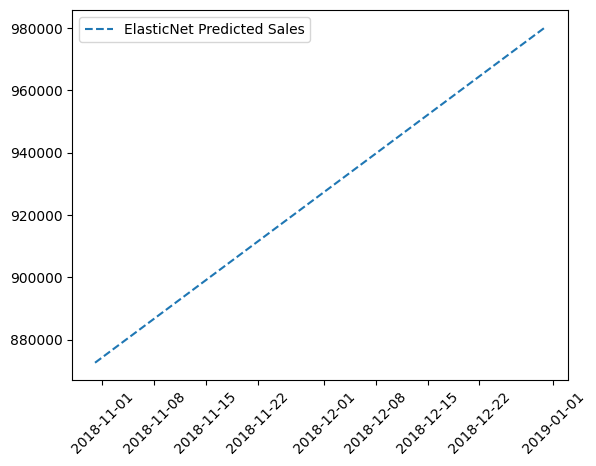

In [62]:
#Predict Future Sales
y_pred_en = elastic_Nt.predict(X_test)

#plotting Results
plt.plot(df_monthly.index[-len(y_test):], y_pred_en, label='ElasticNet Predicted Sales', linestyle='--')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

## Step 5: Model Evaluation

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
#Linear Regression Metrics
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr =  mse_lr ** 0.5

In [65]:
#ElasticNet Metrics
mae_en = mean_absolute_error(y_test, y_pred_en)
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en =  mse_lr ** 0.5

In [66]:
print("Linear Regression - MAE:", mae_lr, "RMSE:", rmse_lr)
print("ElasticNet - MAE:", mae_en, "RMSE:", rmse_en)

Linear Regression - MAE: 130208.06558481853 RMSE: 146691.9783417688
ElasticNet - MAE: 130181.82234191895 RMSE: 146691.9783417688


ElasticNet performs marginally better than Linear Regression on MAE, but the difference is minimal. The RMSE is identical for both models,
which indicates that both models capture the data similarly and handle larger errors in the same way.

# **Step: 6   Dashboard**

https://ecommercesalesanalysis.netlify.app/